<center><div><img src = "http://china-bigdatauniversity.oss-cn-qingdao.aliyuncs.com/dolphin-labs/notebook-header-logo.png", width = 230/></div></center>

<center><h1 align=center><font size = 5>K均值聚类算法(K-Means)</font></h1> 

<h2 align=center><font size = 2>【课程性质：机器学习算法-基础】</font></h2></center>

## 1. 实验目标

使用Sklearn库操作机器学习

## 2. 实验主要使用的 $Python$ 库

|名称|版本|简介|
|----|----|----|
|$Numpy$|$1.16.0$|线性代数|
|$Pandas$|$0.25.0$|数据分析|
|$Matplotlib$|$3.1.0$|数据可视化|
|$SKlearn$|$0.22.1$|机器学习|

## 3. 实验适用的对象

- 本课程假设您已经学习了 $Python$ 基础，具备可视化基础
- 学习对象：本科学生、研究生、人工智能、算法相关研究者、开发者
- 大数据分析与人工智能

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
<center>理论学习部分</center>
</div>

<p><b>机器学习(Machine Learning, ML)是人工智能(AI)的一个子集，是使计算机具有智能的根本途径。</b></p>
在本实验中，您将学习K-Means聚类算法的基本思想、算法以及如何用Python实现。 

<font size=5>**概述**</font>

<p>给定样本集$D={x_1,x_2，\cdots,x_N}$，其中$x_i=(x_i^{(1)},x_i^{(2)},\cdots,x_i^{(n)})$假设聚类的簇划分$\mathscr{C}={C_1,C_2,\cdots,C_K}$。K-Means算法的目标是最小化平方误差。</p>
<p>现在要求最优化问题：</p>
$$\min_{\mathscr{C}}\sum_{k=1}^K\sum_{x_i\in C_k}\parallel x_i-\mu_k\parallel_2^2$$
<p>其中$\mu_k=\frac{1}{|C_k|}\sum_{x_i\in C_k}x_i$</p>
<p>该问题的求解需要考察样本集合$D$的所有可能的簇划分。K-Means算法采用贪心策略，通过迭代优化来近似求解。其原理为：K-Means算法首先假设一组向量作为所有簇的簇均值向量，然后根据假设的簇均值向量给出了数据集D的一个簇划分，再根据这个簇划分来计算真实的簇均值向量</p>
<ul>
    <li>如果真实的簇均值向量等于假设的簇均值向量，则说明假设正确。根据假设簇均值向量给出的数据集D的一个簇划分确实是原问题的解</li>
    <li>如果真实的簇均值向量不等于假设的簇均值向量，则可以将真实的簇均值向量作为新的假设簇均值向量，继续求解。</li></ul>
<p>K-Means算法的<b>策略</b>是：样本离哪个簇的簇均值向量近，则该样本就划归到那个簇</p>


<font size=5>**算法**</font>

<p>输入：样本集$D=\left\{x_1,x_2，\cdots,x_N\right\}$；聚类簇数$K$</p>
<p>输出：簇划分$\mathscr{C}$</p>
<p>算法步骤：</p>
<ul>
    <li>从$D$中随机选择$K$个样本作为初始簇均值向量${\mu_1,\mu_2,\cdots,\mu_K}$</li>
    <li>重复迭代直到算法收敛，迭代内容如下:</li>
    <ul>
        <p>初始化阶段：取$C_k=\phi,k=1,2,\cdots,K$</p>
        <p>划分阶段：令$i=1,2,\cdots,N$</p>
        <ul>
            <li>计算$x_i$的簇标记如下：
            $$\lambda_i=\arg\min_k\parallel x_i-\mu_k\parallel_2,k\in{1,2,\cdots,K}$$</li>
            <li>然后将样本$x_i$划入相应的簇：
            $$C_{\lambda_i}=C_{\lambda_i}\bigcup\left\{x_i\right\}$$</li></ul>
        <p>重计算阶段：计算$\hat{\mu}_k=\frac{1}{|C_k|}\sum_{x_i\in C_k}x_i$</p>
        <p>终止条件判断：</p>
        <ul>
            如果对所有的$k\in{1,2,\cdots,K}$,都有$\hat{\mu}_k=\mu_k$，则算法收敛，终止迭代；否则重复制$\mu_k=\hat{\mu}_k$</ul>
     </ul>
</ul>

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
<center>实践学习部分</center>
</div>

## 4. 实验步骤

### 步骤1 安装并引入必要的库

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

```python
!pip install numpy==1.16.0
!pip install pandas==0.25.0
!pip install scikit-learn==0.22.1
!pip install matplotlib==3.1.0
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

In [ ]:
# 请输入代码：



<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

```python
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.datasets import load_iris 
%matplotlib inline
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

In [1]:
# 请输入代码：

import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.datasets import load_iris 
%matplotlib inline

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


### 步骤2 生成随机数
<p>创建数据集！</p>
<p>首先，我们需要建立一个随机种子。 使用numpy的random.seed()函数，其中种子将被设置为0</p>

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
np.random.seed(0)
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

In [2]:
# 请输入代码：
np.random.seed(0)


接下来，我们将使用**make_blobs**类进行<i>随机点集群<i>。**make_blobs**类接受很多输入，但我们将使用这些特定的输入:
<p><b><u>输入</u></b></p>
<ul>
    <li> <b>n_samples</b>: 生成随机点总数 </li>
    <ul> <li>取值为: 5000 </li> </ul>
    <li> <b>centers</b>:生成样本点的中心 </li>
    <ul> <li> 取值为: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>:类的标准差 </li>
    <ul> <li>取值为: 0.9 </li> </ul>
</ul>
<br>
<b> <u> 输出 </u> </b>
<ul>
    <li> <b>X</b>: 形状为 [n_samples, n_features]的数组。 (特征矩阵（Feature Matrix）)</li>
    <ul> <li> 生成的样本. </li> </ul> 
    <li> <b>y</b>: 形状为[n_samples]的数组. (响应向量（Response Vector）)</li>
    <ul> <li> 样本对应的类别标签 </li> </ul>
</ul>

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

In [3]:
# 请输入代码：

X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

显示随机生成的数据的散点图。

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
plt.scatter(X[:, 0], X[:, 1], marker='.')
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

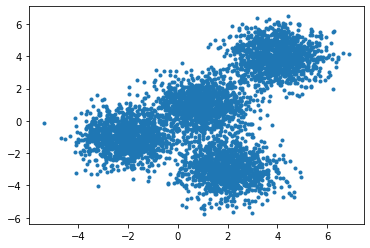

In [4]:
# 请输入代码：

plt.scatter(X[:, 0], X[:, 1], marker='.')

### 步骤3 设置K-Means
现在我们有了我们的随机数据，让我们设置我们的 K-Means聚类。

KMeans类有许多可以使用的参数，但我们将使用这三个参数：
<ul>
    <li> <b>init</b>: 类中心的初始化方法。 </li>
    <ul>
        <li> 取值为: "k-means++" </li>
        <li> k-means++: 以智能方式为k均值聚类选择初始聚类中心，以加速收敛。</li>
    </ul>
    <li> <b>n_clusters</b>: 要形成的聚类数量也是要生成的聚类中心数量。 </li>
    <ul> <li> 取值为: 4 </li> </ul>
    <li> <b>n_init</b>: 设置选择质心种子次数。返回聚类中心最好的一次结果（好是指计算时长短）</li>
    <ul> <li> 取值为: 12 </li> </ul>
</ul>

使用这些参数初始化KMeans，其中输出参数称为k_means。

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

In [5]:
# 请输入代码：
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)


现在让我们用我们上面创建的特征矩阵X来拟合KMeans模型

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
k_means.fit(X)
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

In [6]:
# 请输入代码：

k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

现在让我们使用KMeans的 **.labels\_** 属性为模型中的每个点获取标签，并将其保存为 **k_means_labels**

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
k_means_labels = k_means.labels_
k_means_labels
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

In [7]:
# 请输入代码：
k_means_labels = k_means.labels_
k_means_labels


array([0, 2, 2, ..., 1, 0, 0])

我们还将使用KMeans的.cluster_centers_ 取聚类中心的坐标，并将其保存为k_means_cluster_centers 

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

In [8]:
# 请输入代码：
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers


array([[-2.03375169, -0.99827293],
       [ 3.97334234,  3.98758687],
       [ 1.99876902, -3.01796355],
       [ 0.96959198,  0.98543802]])

### 步骤4 绘图
所以现在我们已经生成了随机数据并且初始化了KMeans模型，让我们对它们进行绘制并看看它是什么样的！

请仔细阅读代码和注释以了解如何绘制模型。

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
# 指定图形尺寸
fig = plt.figure(figsize=(6, 4))

#颜色使用一个颜色映射，它将根据标签的数量生成一个颜色数组。 我们使用set（k_means_labels）来获取唯一的标签。
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

#创建一个黑色背景（背景为黑色，这样有助于我们看到各类中的样本点与聚类中心的连接）
ax = fig.add_subplot(1, 1, 1, facecolor = 'black')

# 用于绘制数据点和聚类中心的循环。
#k将在0-3范围内，这将匹配每个数据点所在的可能簇。

for k, col in zip(range(len([[2, 2], [-2, -1], [4, -3], [1, 1]])), colors):

    # 创建所有数据点的列表，其中类中的数据点标记为true，否则标记为false。
    my_members = (k_means_labels == k)
    
    # 定义聚类中心
    cluster_center = k_means_cluster_centers[k]
    
    # 使用color col绘制数据点.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    
    # 指定颜色绘制聚类中心
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)

# 图名称
ax.set_title('KMeans')

# 删除x轴刻度
ax.set_xticks(())

# 删除y轴刻度
ax.set_yticks(())

# 展示图
plt.show()

# 显示上面的散点图进行比较。
plt.scatter(X[:, 0], X[:, 1], marker='.')
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

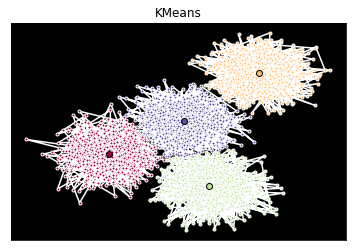

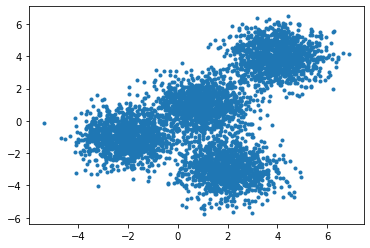

In [9]:
# 请输入代码：

# 指定图形尺寸
fig = plt.figure(figsize=(6, 4))

#颜色使用一个颜色映射，它将根据标签的数量生成一个颜色数组。 我们使用set（k_means_labels）来获取唯一的标签。
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

#创建一个黑色背景（背景为黑色，这样有助于我们看到各类中的样本点与聚类中心的连接）
ax = fig.add_subplot(1, 1, 1, facecolor = 'black')

# 用于绘制数据点和聚类中心的循环。
#k将在0-3范围内，这将匹配每个数据点所在的可能簇。

for k, col in zip(range(len([[2, 2], [-2, -1], [4, -3], [1, 1]])), colors):

    # 创建所有数据点的列表，其中类中的数据点标记为true，否则标记为false。
    my_members = (k_means_labels == k)
    
    # 定义聚类中心
    cluster_center = k_means_cluster_centers[k]
    
    # 使用color col绘制数据点.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    
    # 指定颜色绘制聚类中心
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)

# 图名称
ax.set_title('KMeans')

# 删除x轴刻度
ax.set_xticks(())

# 删除y轴刻度
ax.set_yticks(())

# 展示图
plt.show()

# 显示上面的散点图进行比较。
plt.scatter(X[:, 0], X[:, 1], marker='.')

### 步骤5 聚类分析
对iris数据集进行聚类分析

使用<b> load_iris() </b> 函数, 将iris数据集储存在变量<b>iris</b>中

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
iris = load_iris()
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

In [10]:
# 请输入代码：
iris = load_iris()


同时将iris.data赋值给X变量，将iris.target赋值给y变量

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
X = iris.data
y = iris.target 
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

In [11]:
# 请输入代码：
X = iris.data
y = iris.target 


现在让我们运行其余的代码，看看<b>K-Means</b>产生的结果！

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_8': KMeans(n_clusters=8),
              'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
                                              init='random')}

fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    fignum = fignum + 1

# 绘制结果
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
#重新排序标签以使颜色与聚类结果匹配
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

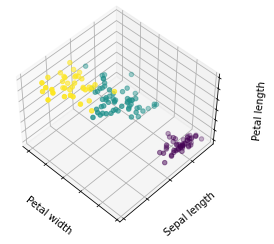

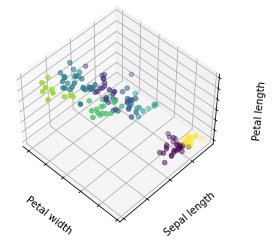

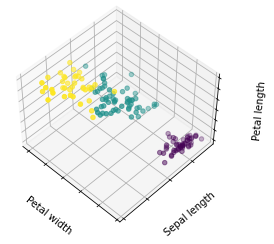

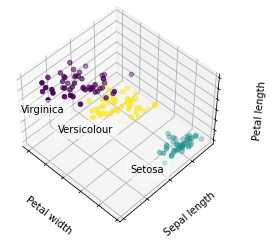

In [12]:
# 请输入代码：
estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_8': KMeans(n_clusters=8),
              'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
                                              init='random')}

fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    fignum = fignum + 1

# 绘制结果
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
#重新排序标签以使颜色与聚类结果匹配
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()


从上面的结果可以看出，K-means聚类算法所采用的迭代算法，直观易懂。但是也存在非常大的局限性，K-Means算法对于随机选择的聚类中心很敏感，预先设定的K之不同，聚类结果不同。

---

<div class="alert alert-danger alertdanger" style="margin-top: 10px">
<h4> 练习1</h4>
<b>批发商希望根据顾客的消费来设计有针对性的营销活动。sale_customers.csv数据集为我们提供了6类商品的客户年度支出数据。运行下面的单元格读取数据，并对数据做K-Means聚类。</b>
</div>

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

```python
# 读取数据
import numpy as np
import pandas
sale= pandas.read_csv("sale_customers.csv", delimiter=",")
print(sale)
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

In [13]:
# 请输入代码：

import numpy as np
import pandas
sale= pandas.read_csv("sale_customers.csv", delimiter=",")
print(sale)

     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0     2674   2674     2674    2674              2674        1338
1     3293   3293     3293    3293              3293        1776
2     3516   3516     3516    3516              3516        7844
3      507    507      507     507               507        1788
4     1777   1777     1777    1777              1777        5185
..     ...    ...      ...     ...               ...         ...
457     93     93       93      93                93        2346
458  14841  14841    14841   14841             14841        1867
459    168    168      168     168               168        2125
460    477    477      477     477               477          52
461    477    477      477     477               477          52

[462 rows x 6 columns]


<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

In [14]:
# 对数据K-means聚类

from sklearn.cluster import KMeans
model = KMeans(init = "k-means++", n_clusters = 4, n_init = 12) 
model.fit(sale) #开始聚类
model_cluster_centers = model.cluster_centers_
print(model_cluster_centers)#聚类中心
model_labels = model.labels_
print(model_labels)#类标签

[[  660.47987616   660.47987616   660.47987616   660.47987616
    660.47987616  1368.90092879]
 [14039.29166667 14039.29166667 14039.29166667 14039.29166667
  14039.29166667  1687.95833333]
 [30806.4        30806.4        30806.4        30806.4
  30806.4         2812.8       ]
 [ 5479.78181818  5479.78181818  5479.78181818  5479.78181818
   5479.78181818  1793.08181818]]
[0 3 3 0 0 0 3 3 0 3 3 0 3 3 3 0 3 0 0 0 0 0 0 0 3 3 3 0 0 3 0 0 0 0 0 0 3
 0 3 3 0 0 0 0 3 3 3 3 3 2 3 1 0 0 0 3 0 0 1 3 0 3 3 3 2 3 3 0 2 3 3 0 0 0
 3 0 0 0 0 0 1 0 0 0 0 3 3 0 3 2 1 0 0 0 0 0 1 0 3 0 3 0 0 0 0 3 3 3 0 0 0
 3 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 3 0 3 3 3 3 0 0 1 3 3 3 0 0 0 3 3 0 1 0 3 0
 0 0 0 0 0 3 3 0 0 0 0 3 3 3 0 0 0 3 0 0 0 3 0 0 0 1 1 0 0 0 3 0 3 3 1 0 1
 0 3 3 3 1 0 3 0 0 0 3 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0
 0 0 0 0 1 0 0 0 0 0 3 0 0 0 0 0 0 0 3 0 3 0 3 0 0 0 0 0 0 0 0 0 0 3 3 0 0
 0 0 0 0 0 0 0 0 0 0 0 3 0

<div align="right"class="answer-box-power">
<a href="#q1" class="btn btn-default" data-toggle="collapse">获取答案</a>
</div>
<div id="q1" class="collapse">

代码：    
``` Python
from sklearn.cluster import KMeans
model = KMeans(init = "k-means++", n_clusters = 4, n_init = 12) 
model.fit(sale) #开始聚类
model_cluster_centers = model.cluster_centers_
print(model_cluster_centers)#聚类中心
model_labels = model.labels_
print(model_labels)#类标签
```

</div>

**K-Means与KNN**

  初学者很容易把K-Means和KNN搞混，两者其实差别还是很大的。
  
* K-Means是无监督学习的聚类算法，没有样本输出；而KNN是监督学习的分类算法，有对应的类别输出。
* KNN基本不需要训练，对测试集里面的点，只需要找到在训练集中最近的k个点，用这最近的k个点的类别来决定测试点的类别。而K-Means则有明显的训练过程，找到k个类别的最佳质心，从而决定样本的簇类别。
* 当然，两者也有一些相似点，两个算法都包含一个过程，即找出和某一个点最近的点。
* 两者都利用了最近邻(nearest neighbors)的思想。

**感谢您完成本次实验！**

这是**K均值聚类**实验的结尾。希望现在您对K均值聚类及其结构和流程的工作有了更深入的了解。感谢您阅读本次实验，祝您学习愉快。

## 5.实验总结
K-Means优缺点总结

* 优点
    * 1）原理比较简单，实现也是很容易，收敛速度快。
    * 2）聚类效果较优。
    * 3）算法的可解释度比较强。
    * 4）主要需要调参的参数仅仅是簇数k。

* 缺点
    * 1）K值的选取不好把握
    * 2）对于不是凸的数据集比较难收敛
    * 3）如果各隐含类别的数据不平衡，比如各隐含类别的数据量严重失衡，或者各隐含类别的方差不同，则聚类效果不佳。
    * 4） 采用迭代方法，得到的结果只是局部最优。
    * 5） 对噪音和异常点比较的敏感。

<hr>

[<img src = "https://dolphin-public.oss-cn-shanghai.aliyuncs.com/img/copyright.png">](http://www.dolphin-labs.com)